<a href="https://colab.research.google.com/github/Jainharshit09/BDA/blob/main/pre%20Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Shuffle the dataSet**
In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 500 rows of legitimate url data & bottom 416 of phishing url data.

In [1]:
import pandas as pd
from sklearn.utils import shuffle
data0 = pd.read_csv('urldata.csv')
legitimate_websites = data0[data0['Label'] == 0]
phishing_websites = data0[data0['Label'] == 1]
legitimate_websites_shuffled = shuffle(legitimate_websites)
phishing_websites_shuffled = shuffle(phishing_websites)
shuffled_data = pd.concat([legitimate_websites_shuffled, phishing_websites_shuffled])
shuffled_data = shuffle(shuffled_data)
shuffled_data.reset_index(drop=True, inplace=True)
print(shuffled_data.head())
shuffled_data.to_csv('shuffled_urldata.csv', index=False)


                           Domain  Have_IP  Have_At  URL_Length  URL_Depth  \
0                      mylust.com        0        0           1          3   
1  agreementupdateatt.wixsite.com        0        0           0          1   
2            perdoesdiesel.com.br        0        0           1          3   
3                     espn.go.com        0        0           1          8   
4                    torcache.net        0        0           1          2   

   Redirection  https_Domain  TinyURL  Prefix/Suffix  DNS_Record  Web_Traffic  \
0            0             0        1              0           0            1   
1            0             0        0              0           0            1   
2            0             0        0              0           0            0   
3            0             0        0              0           0            1   
4            0             0        0              0           0            0   

   Domain_Age  Domain_End  iFrame  Mouse_Ove

#**1. Loading Data**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data0 = pd.read_csv('shuffled_urldata.csv')
data0.tail(10)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
10407,docs.google.com,0,0,1,5,0,0,0,0,1,1,1,1,0,0,1,0,1
10408,500px.com,0,0,1,3,0,0,1,0,0,1,0,0,0,0,1,0,0
10409,hindva.com,0,0,1,5,0,0,0,0,0,0,0,1,0,0,1,0,1
10410,otomoto.pl,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,1,0
10411,wps-dev.com,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,1
10412,noutbookofff.ru,0,0,0,2,0,0,0,0,0,1,0,1,0,0,1,0,1
10413,twitter.com,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
10414,email.hvviinc.com,0,0,0,2,0,0,0,0,0,1,1,1,0,1,1,0,1
10415,rftgvgyhu.univer.se,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1
10416,torrentdn.com,0,0,1,2,0,0,0,0,0,1,0,1,0,0,1,0,0


# **2.  Familiarizing with Data**

In [4]:
data0.shape

(10417, 18)

In [5]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [6]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10417 non-null  object
 1   Have_IP        10417 non-null  int64 
 2   Have_At        10417 non-null  int64 
 3   URL_Length     10417 non-null  int64 
 4   URL_Depth      10417 non-null  int64 
 5   Redirection    10417 non-null  int64 
 6   https_Domain   10417 non-null  int64 
 7   TinyURL        10417 non-null  int64 
 8   Prefix/Suffix  10417 non-null  int64 
 9   DNS_Record     10417 non-null  int64 
 10  Web_Traffic    10417 non-null  int64 
 11  Domain_Age     10417 non-null  int64 
 12  Domain_End     10417 non-null  int64 
 13  iFrame         10417 non-null  int64 
 14  Mouse_Over     10417 non-null  int64 
 15  Right_Click    10417 non-null  int64 
 16  Web_Forwards   10417 non-null  int64 
 17  Label          10417 non-null  int64 
dtypes: int64(17), object(1)
me

# **3. Visualizing the data**

Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

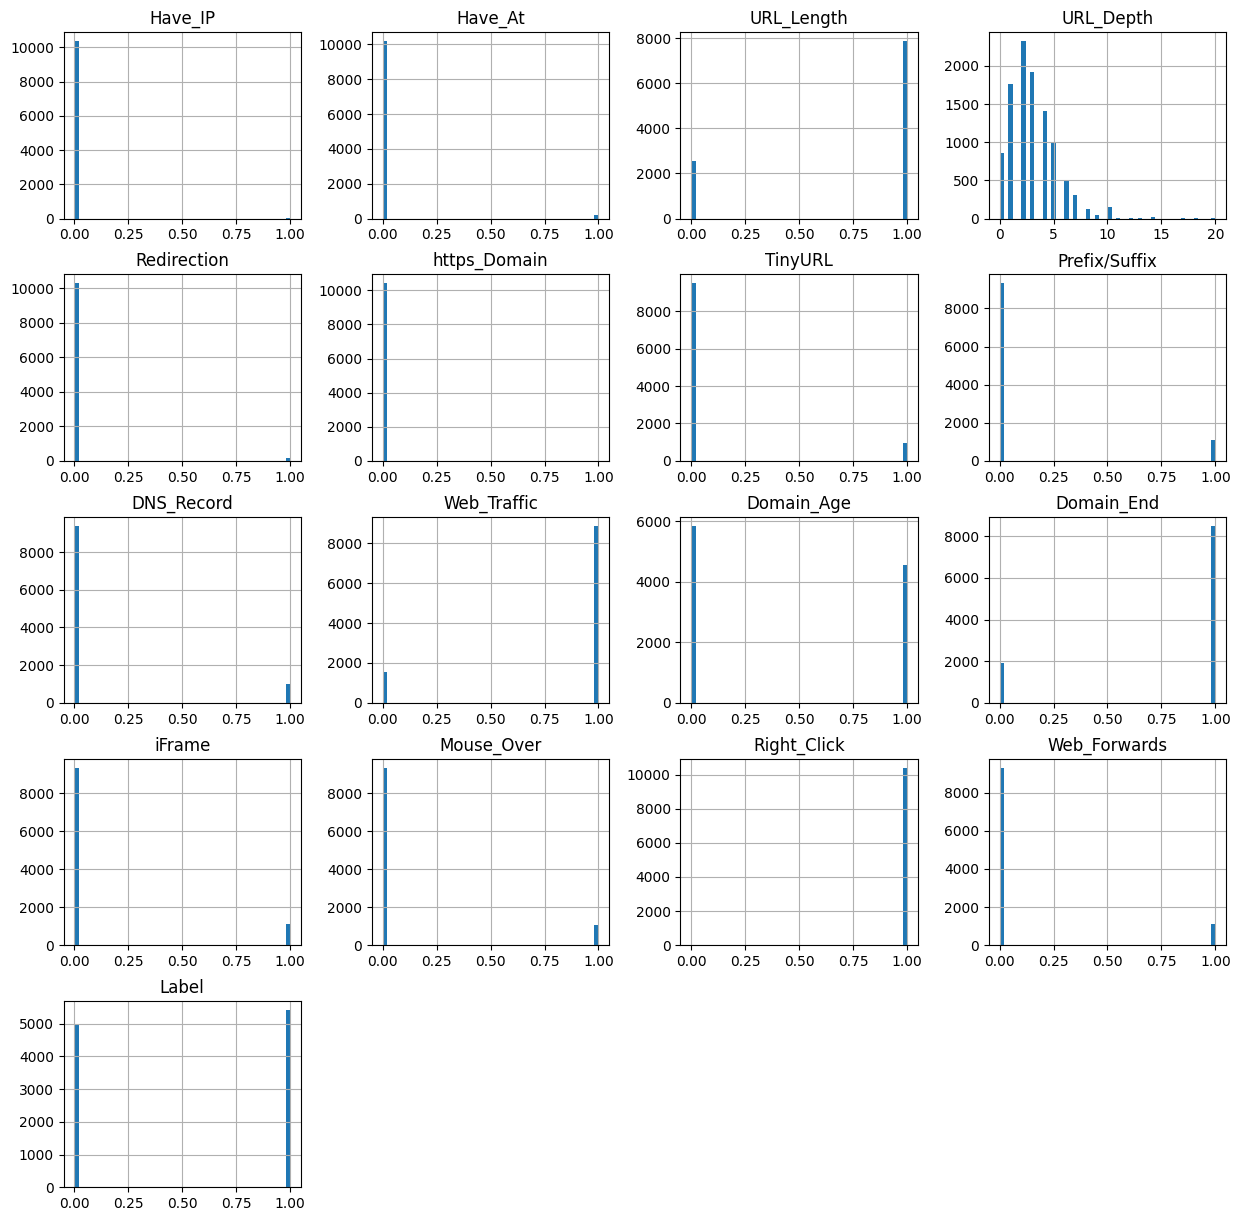

In [7]:
data0.hist(bins = 50,figsize = (15,15))
plt.show()

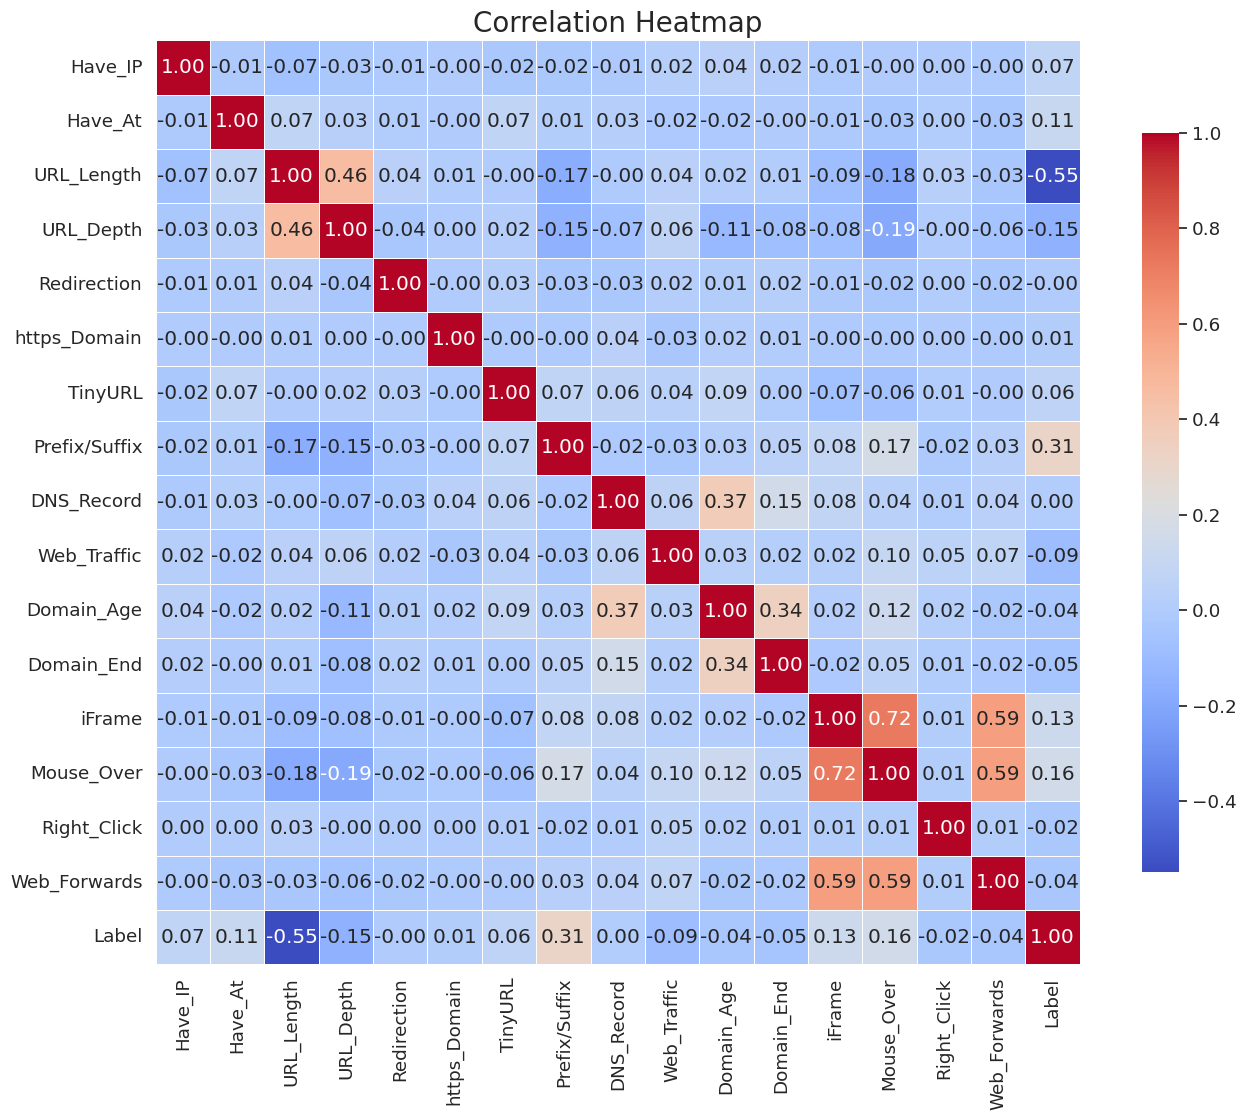

In [8]:
numeric_data = data0.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the figure size and aesthetics
plt.figure(figsize=(16, 12))
sns.set(font_scale=1.2)  # Increase font size for better readability
sns.set_style('whitegrid')

# Create the heatmap
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,  # Show the correlation coefficients
    fmt='.2f',  # Format the annotation to 2 decimal places
    cmap='coolwarm',  # Use a diverging color palette
    square=True,  # Make squares in the heatmap
    cbar_kws={"shrink": .8},  # Adjust color bar size
    linewidths=0.5,  # Add lines between cells
)

# Set the title and show the plot
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

# **4. Data Preprocessing & EDA**

In [9]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,10417.00000,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000,10417.000000
mean,0.005280,0.021983,0.754728,2.995872,0.013152,0.000192,0.088605,0.105213,0.096765,0.851877,0.43717,0.817510,0.104061,0.103965,0.999328,0.106269,0.520015
std,0.072474,0.146636,0.430269,2.139455,0.113929,0.013856,0.284187,0.306842,0.295652,0.355239,0.49606,0.386267,0.305354,0.305229,0.025915,0.308196,0.499623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the 'Domain' column from the dataset.

In [10]:
data = data0.drop(['Domain'], axis = 1).copy()

In [11]:

#checking the data for null or missing values
data.isnull().sum()

,0
Have_IP,0
Have_At,0
URL_Length,0
URL_Depth,0
Redirection,0
https_Domain,0
TinyURL,0
Prefix/Suffix,0
DNS_Record,0
Web_Traffic,0


#**5. Splitting the Data**


In [12]:
y=data['Label']
X = data.drop('Label',axis=1)
X.shape,y.shape

((10417, 16), (10417,))

In [13]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8333, 16), (2084, 16))

# **6. Machine Learning Models & Training**

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:



*   Decision Tree
*   Random Forest
*   Multilayer Perceptrons
*   XGBoost
*  Support Vector Machines



In [14]:
from sklearn.metrics import accuracy_score

In [15]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

**Decision Tree**

In [16]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [17]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [18]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.815
Decision Tree: Accuracy on test Data: 0.812


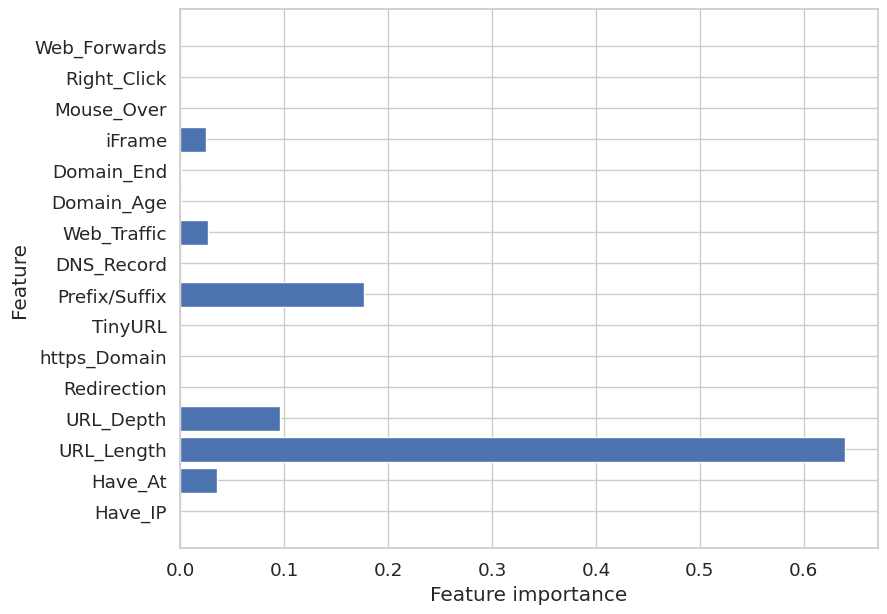

In [19]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [20]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)